# Attrition Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data=pd.read_csv("dataset/general_data.csv")
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [6]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [7]:
data["NumCompaniesWorked"]=data["NumCompaniesWorked"].fillna(data["NumCompaniesWorked"].mean())
data["TotalWorkingYears"]=data["TotalWorkingYears"].fillna(data["TotalWorkingYears"].mean())

In [8]:
data.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

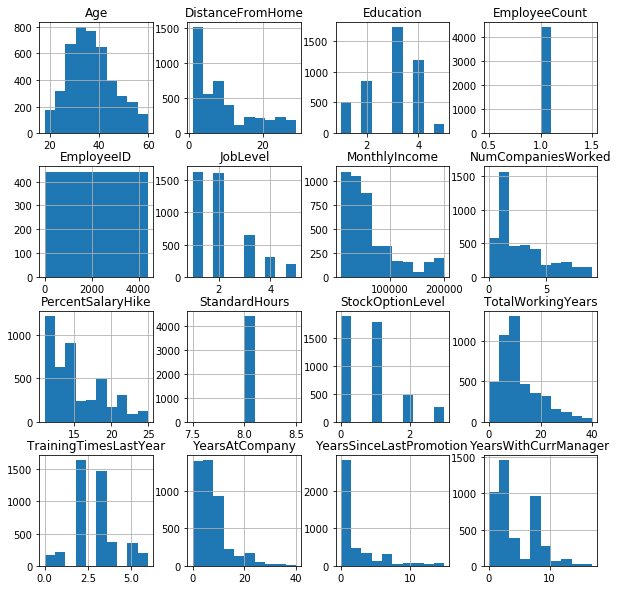

In [9]:
data.hist(figsize=(10,10))
plt.show()

# Inference
Employee Count,Standard Hours,Employee Id are not useful for the Analysis.

Education, Job Level, Stock Option Level are Categorical Values.

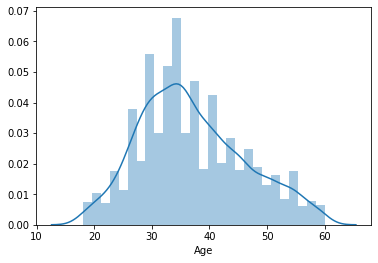

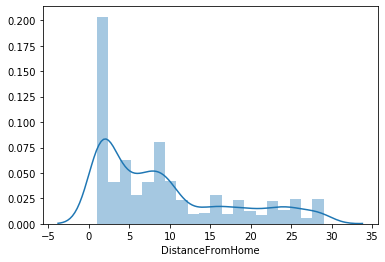

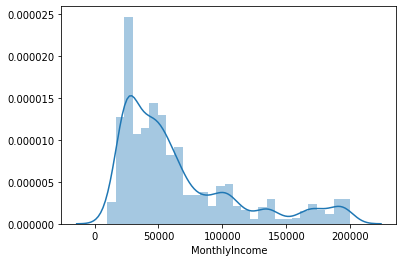

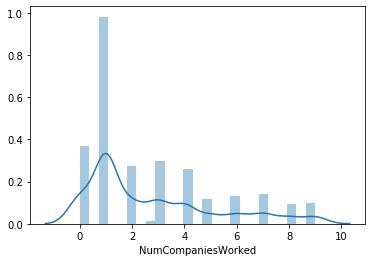

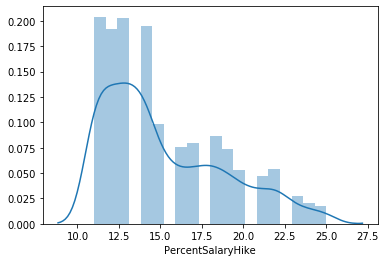

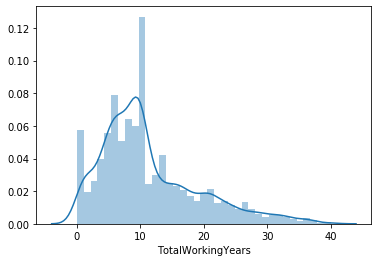

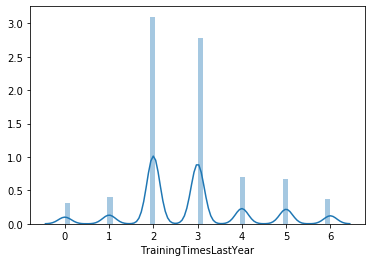

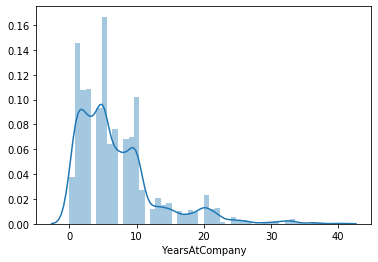

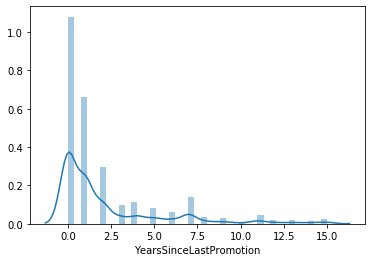

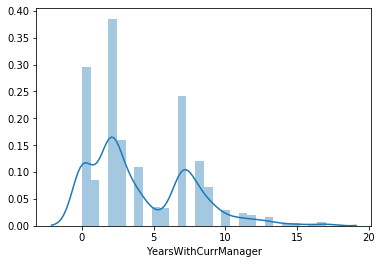

In [11]:
col_list=['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 
           'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
for col in col_list:
    sb.distplot(data[col])
    plt.show()

# Inference

Age, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsSinceLastPromotion is Unimodal.

DistanceFromHome is Bimodal.

MonthlyIncome, TrainingtimesLastYear, YearsAtCompany, YearswithCurrManager is Multimodal.

# EDA

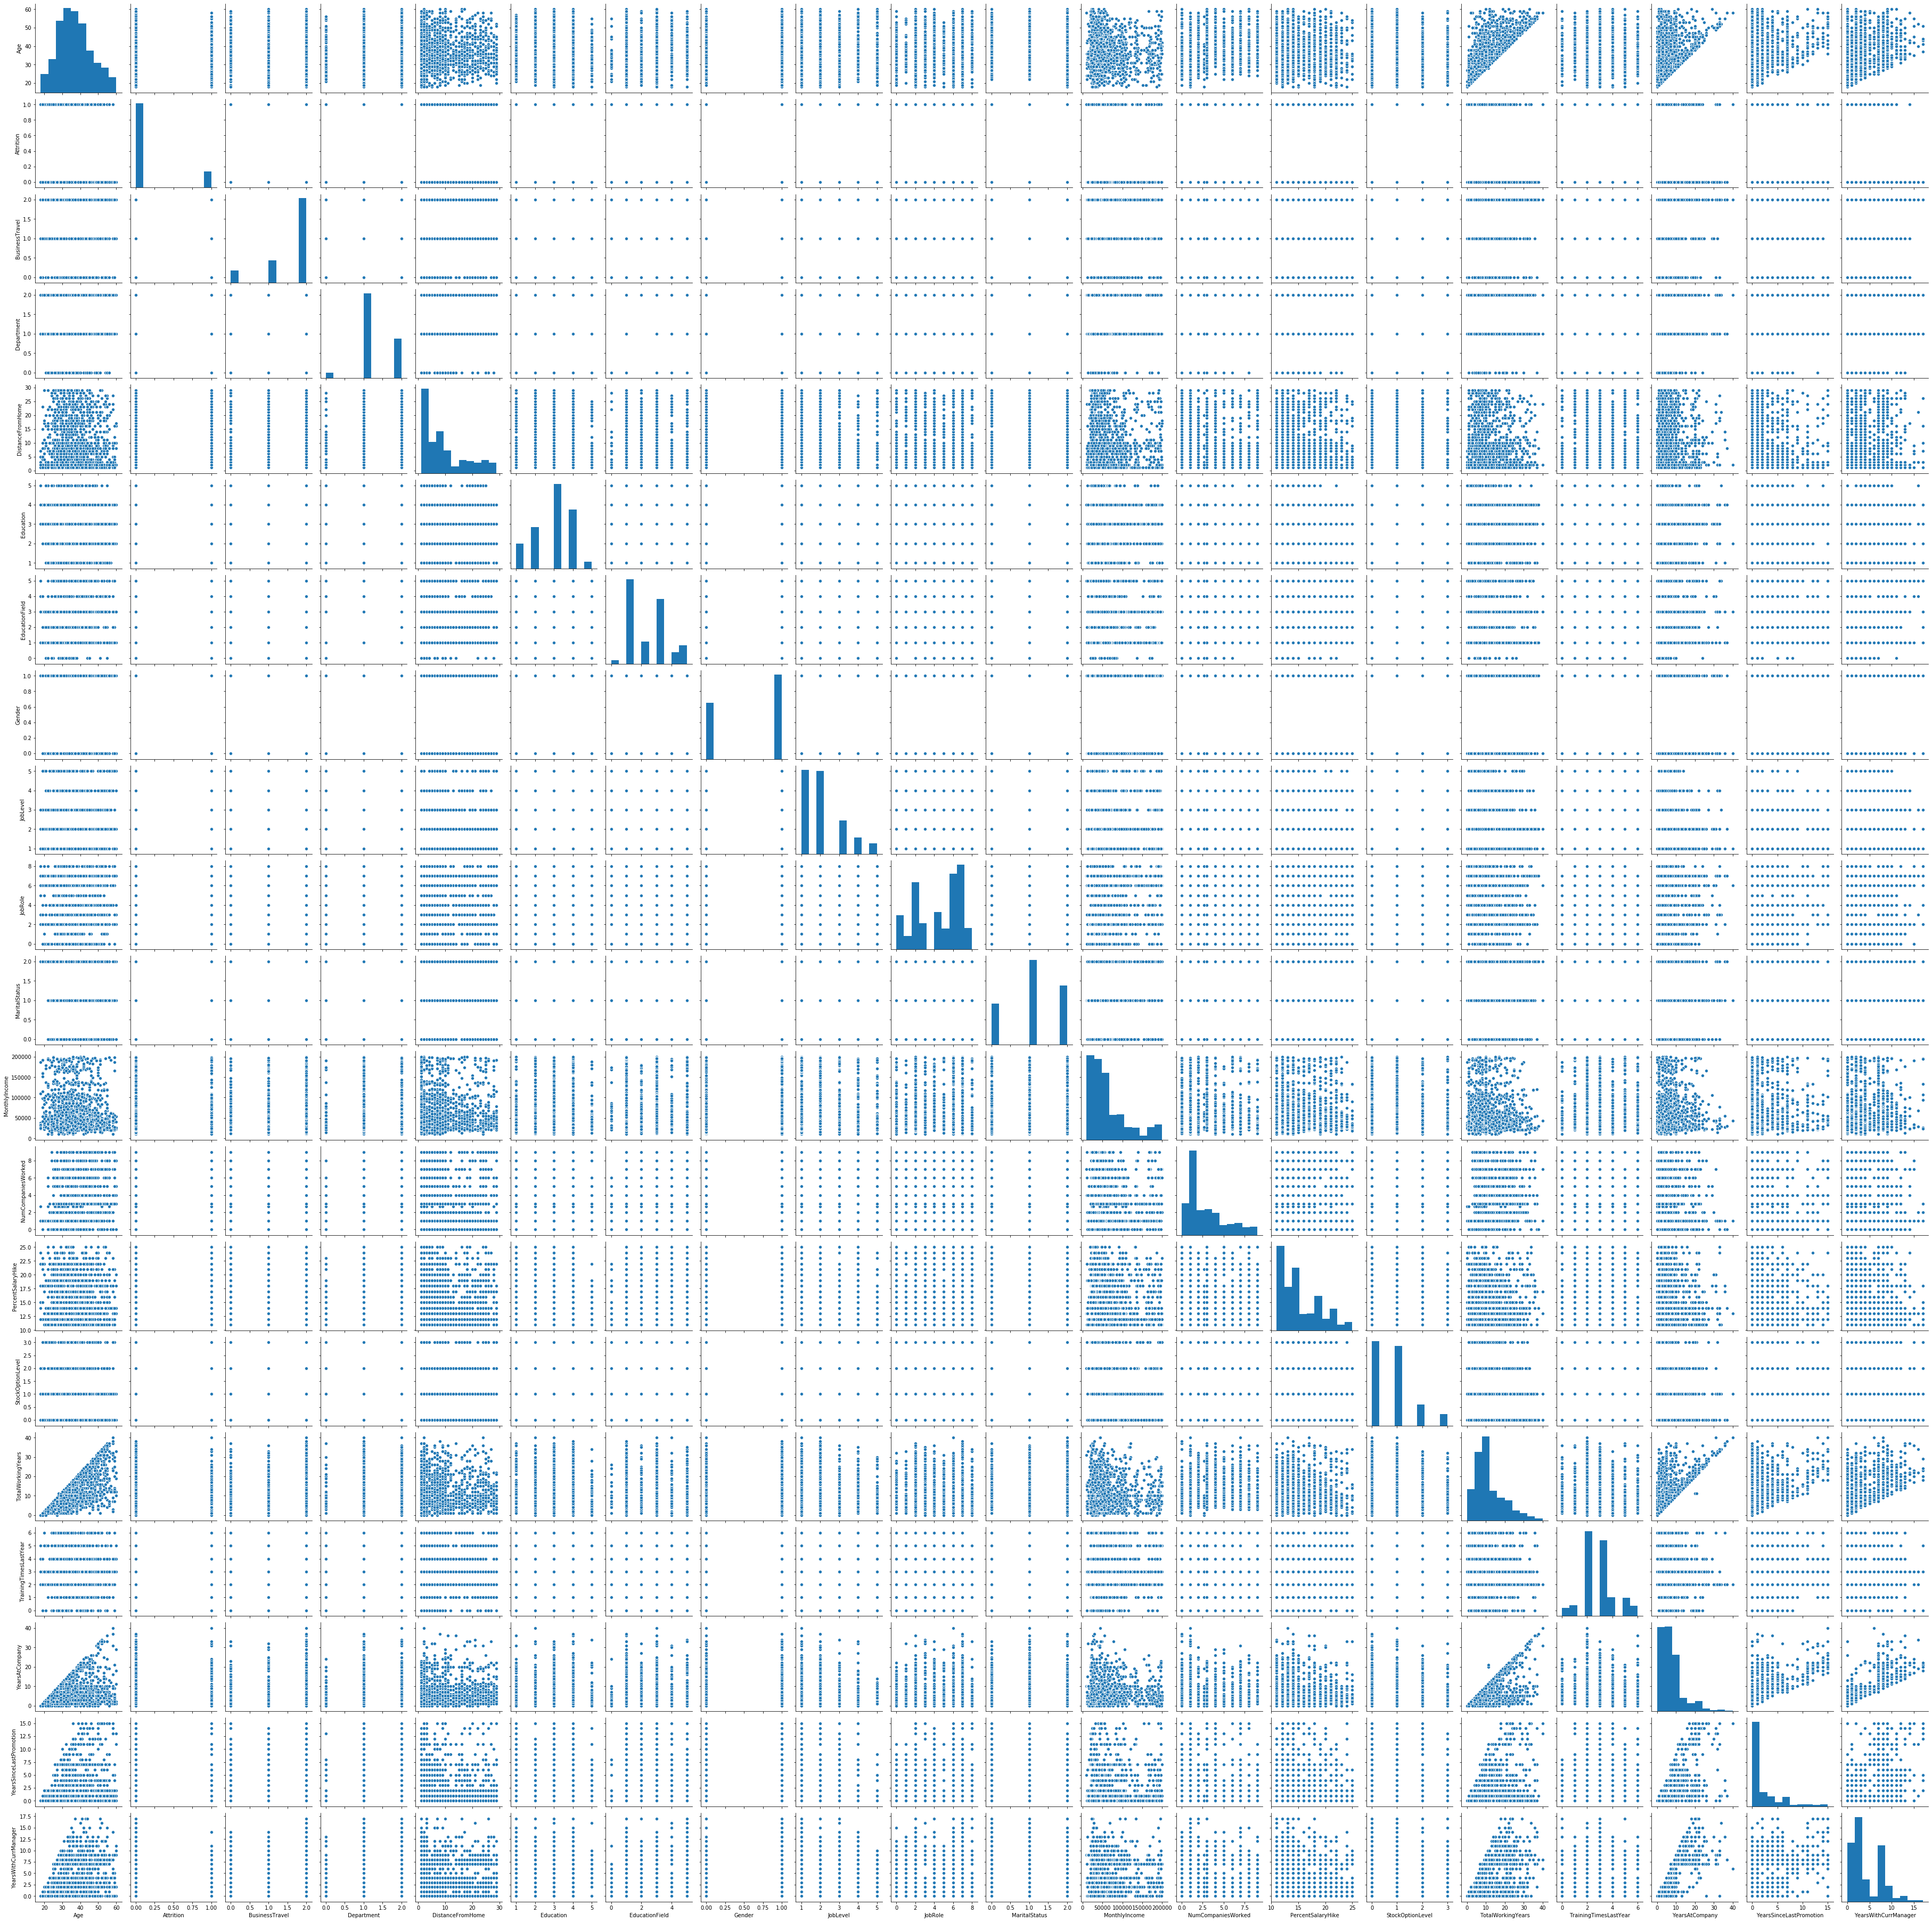

In [31]:
sb.pairplot(data)

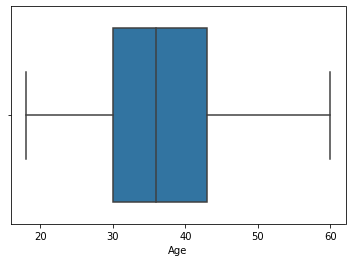

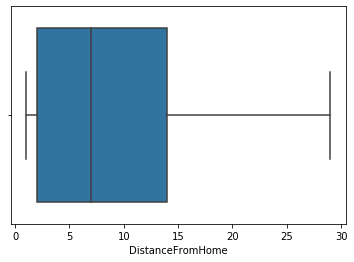

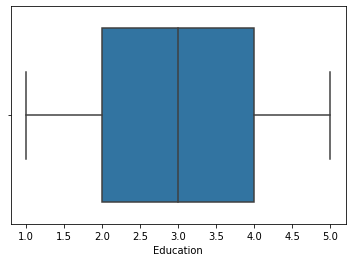

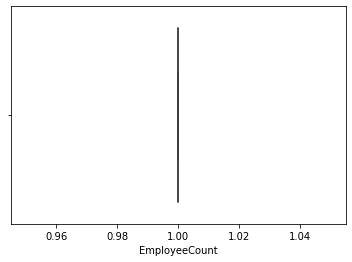

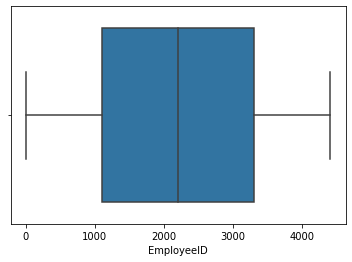

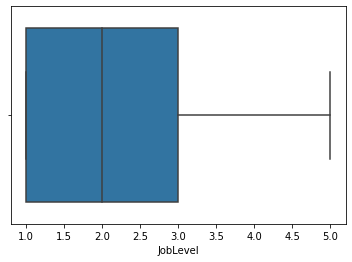

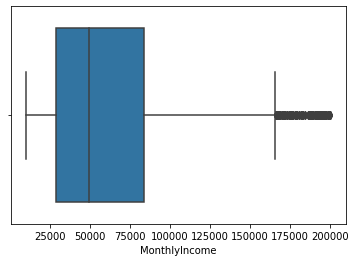

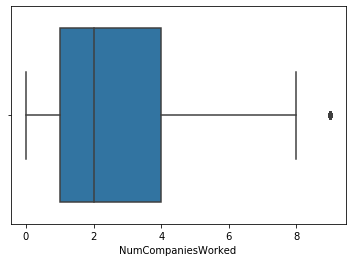

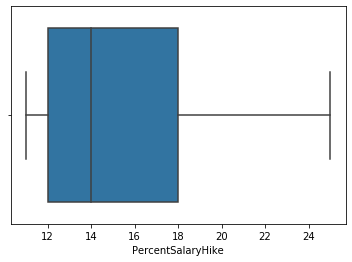

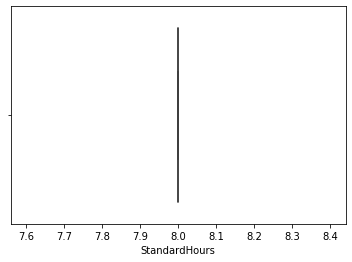

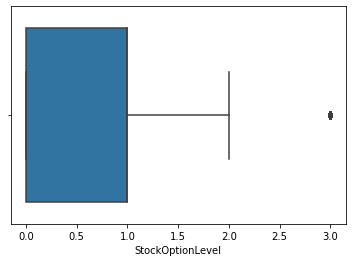

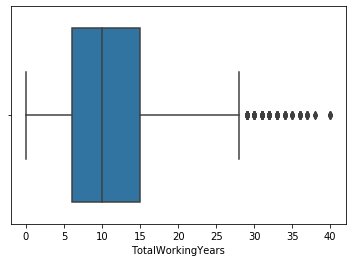

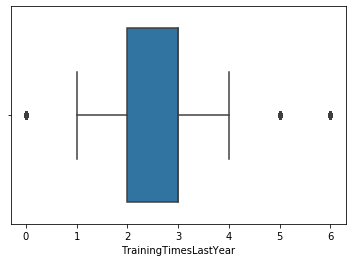

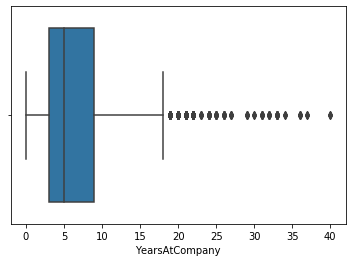

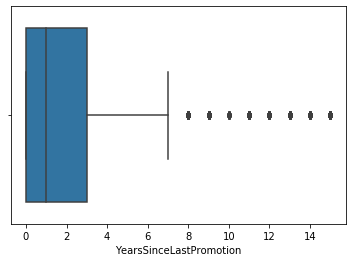

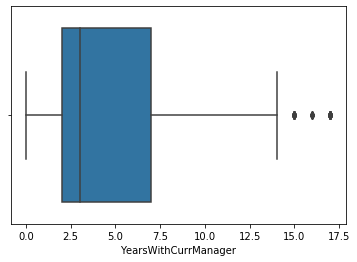

In [13]:
column_list = ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID','JobLevel','MonthlyIncome', 
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours','StockOptionLevel',
       'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']

for a in column_list:
    sb.boxplot(data[a])
    plt.show()

# Inference

__No Outliers:__
Age, DistanceFromHome, Education, EmployeeID, JobLevel, PercentSalaryHike.

__Outliers:__
TrainingTimesLastYear, YearsWithCurrManager, MonthlyIncome, NumCompaniesWorked, StockOptionLevel.

__Irrelevant Data:__
EmployeeCount , StandardHours.

# Converting Object type Columns to Int

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Attrition'] = le.fit_transform(data['Attrition'])
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['Over18'] = le.fit_transform(data['Over18'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['Gender'] = le.fit_transform(data['Gender'])
data['EducationField'] = le.fit_transform(data['EducationField'])

In [17]:
data = data.drop(['EmployeeCount','EmployeeID', 'Over18','StandardHours'], axis=1)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [18]:
y_log=data.iloc[:,1:2]
y_log.head()

,Attrition
0,0
1,1
2,0
3,0
4,0


In [19]:
x_log = data.drop(['Attrition'], axis=1)
x_log.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


# Logistic Regression

In [21]:
import statsmodels.api as stm

In [22]:
x_con=stm.add_constant(x_log)

In [23]:
log_reg=stm.Logit(y_log,x_con)

In [24]:
res=log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.393016
         Iterations 7


In [29]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4390
Method:                           MLE   Df Model:                           19
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.1102
Time:                        01:45:32   Log-Likelihood:                -1733.2
converged:                       True   LL-Null:                       -1947.9
Covariance Type:            nonrobust   LLR p-value:                 3.381e-79
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0759      0.414      0.183      0.855      -0.735       0.887
Age                        -0.0309      0.007     -4.524      0.000      -0.044      -0.018
BusinessTravel             -0.0177      0.065     -0.270      0.787      -0.146       0.111
Department                 -0.2423      0.081     -2.981      0.003      -0.402      -0.083
DistanceFromHome           -0.0013      0.005     -0.247      0.805      -0.012       0.009
Education                  -0.0628      0.043     -1.473      0.141      -0.146       0.021
EducationField             -0.0966      0.033     -2.894      0.004      -0.162      -0.031
Gender                      0.0860      0.090      0.961      0.337      -0.089       0.262
JobLevel                   -0.0241      0.040     -0.608      0.543      -0.102       0.054
JobRole                     0.0377      0.018      2.108      0.035       0.003       0.073
MaritalStatus               0.5887      0.063      9.323      0.000       0.465       0.712
MonthlyIncome           -1.874e-06   9.56e-07     -1.961      0.050   -3.75e-06   -6.75e-10
NumCompaniesWorked          0.1163      0.018      6.338      0.000       0.080       0.152
PercentSalaryHike           0.0118      0.012      1.005      0.315      -0.011       0.035
StockOptionLevel           -0.0639      0.052     -1.238      0.216      -0.165       0.037
TotalWorkingYears          -0.0574      0.012     -4.819      0.000      -0.081      -0.034
TrainingTimesLastYear      -0.1467      0.035     -4.171      0.000      -0.216      -0.078
YearsAtCompany              0.0120      0.018      0.656      0.512      -0.024       0.048
YearsSinceLastPromotion     0.1322      0.020      6.459      0.000       0.092       0.172
YearsWithCurrManager       -0.1395      0.022     -6.308      0.000      -0.183      -0.096
===========================================================================================
"""

# Inference

BusinessTravel, DistanceFromHome, Education, Gender, JobLevel, PercentSalaryHike, StockOptionLevel, YearsAtCompany have p value more than 0.05 so, they are not that Important.

Age, Department, EducationField, JobRole, MaritalStatus, MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, TrainingTimesLastYear, YearsSinceLastPromotion, YearsWithCurrManager has p value less than 0.05 which means they are most Important.

__Equation:__

__Attrition__ = 0.075 + (-0.03)Age + (-0.02)BusinessTravel + (-0.24)Department + (-0.0013)DistanceFromHome + (-0.06)Education+ (-0.097)EducationField + (0.086)Gender + (-0.02)JobLevel + (0.038)JobRole + (0.589)MaritalStatus + (-1.8e-06)MonthlyIncome + (0.116)NumCompaniesWorked + (0.012)PercentSalaryHike + (-0.06)StockOptionLevel + (-0.057)TotalWorkingYears + (-0.147)TrainingTimesLastYear + (0.012)YearsAtCompany + (0.132)YearsSinceLastPromotion + (-0.1395)YearsWithCurrManager